In [468]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 6.2 Data Cleaning and Preparation

- Downloading the dataset
- Re-encoding the categorical variables
- Doing the train/validation/test split

In [469]:
df = pd.read_csv('CreditScoring.csv')

In [470]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


### 6.2.1 Reformat categorical columns (status, home, marital, records, and job) by mapping with appropriate values.
- Decode all categorical values into strings

In [471]:
df.columns = df.columns.str.lower()

In [472]:
df.status = df.status.map({1: 'ok', 2: 'default', 0: 'unk'})

In [473]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [474]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

In [475]:
marital_status = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_status)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [476]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


### 6.2.2 Replace the maximum value of income, assests, and debt columns with NaNs.
- They contain unexpectedly large numbers, so we'll replace them.

In [477]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [478]:
df.income.max()

99999999

In [479]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [480]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


### 6.2.3 Extract only those rows in the column status who are either ok or default as value.

In [481]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

we have just one unknown value, so we can remove that.

In [482]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [483]:
df.status.value_counts()

status
ok         3200
default    1254
Name: count, dtype: int64

### 6.2.4 Split the data in a two-step process which finally leads to the distribution of 60% train, 20% validation, and 20% test sets with random seed to 11.

In [484]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [485]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

### 6.2.5 Prepare target variable status by converting it from categorical to binary, where 0 represents ok and 1 represents default.

#### Setting our target variables

In [486]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values
y_train

array([1, 1, 0, ..., 0, 0, 0])

### 6.2.6 Finally delete the target variable from the train/val/test dataframe.

In [487]:
del df_train['status']
del df_val['status']
del df_test['status']

In [488]:
df_train.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897


## 6.3 Decision Trees
- How a decision tree looks like
- Training a decision tree
- Overfitting
- Controlling the size of a tree

In [489]:
# an eg of a decision tree in function
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else: 
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [490]:
# Convert first record to dictionary
df_train.iloc[0].to_dict()

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [491]:
# pick a candidate to use for eg
xi = df_train.iloc[0].to_dict()
xi

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [492]:
assess_risk(xi)

'ok'

In [493]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

Turn train dataframe into dictionary, dictionary into feature matrix, and then train the model.

In [494]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [495]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_train

array([[3.60e+01, 1.00e+03, 1.00e+04, ..., 0.00e+00, 1.00e+01, 3.60e+01],
       [3.20e+01, 1.10e+03, 0.00e+00, ..., 1.00e+00, 6.00e+00, 4.80e+01],
       [4.00e+01, 1.32e+03, 0.00e+00, ..., 0.00e+00, 1.00e+00, 4.80e+01],
       ...,
       [1.90e+01, 4.00e+02, 0.00e+00, ..., 0.00e+00, 1.00e+00, 2.40e+01],
       [4.30e+01, 2.50e+03, 1.80e+04, ..., 0.00e+00, 1.50e+01, 4.80e+01],
       [2.70e+01, 4.50e+02, 5.00e+03, ..., 1.00e+00, 1.20e+01, 4.80e+01]])

In [496]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

#### Train model/decision tree

In [497]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

#### Test with Validation dataset

In [498]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)
X_val

array([[3.10e+01, 5.50e+02, 0.00e+00, ..., 0.00e+00, 6.00e+00, 3.60e+01],
       [3.80e+01, 1.00e+03, 0.00e+00, ..., 0.00e+00, 1.80e+01, 6.00e+01],
       [4.00e+01, 7.00e+02, 0.00e+00, ..., 1.00e+00, 1.70e+01, 2.40e+01],
       ...,
       [3.60e+01, 3.90e+03, 2.90e+04, ..., 1.00e+00, 2.00e+00, 6.00e+01],
       [2.50e+01, 3.00e+02, 0.00e+00, ..., 1.00e+00, 3.00e+00, 2.40e+01],
       [3.20e+01, 1.55e+03, 6.00e+03, ..., 0.00e+00, 1.50e+01, 6.00e+01]])

In [499]:
y_pred = dt.predict_proba(X_val)
y_pred

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

It's currently a 2d array which will give us an error when we run below with roc_auc_score, so we collect just 1 column required.

In [500]:
y_pred = dt.predict_proba(X_val)[:, 1]
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [501]:
roc_auc_score(y_val, y_pred)

0.6419710106318568

66% doesn't seem to be impressive for the model. Proceed with more exploration.

In [502]:
# Check ROC again with training data
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

On the training dataset we score 1, on the validation dataset we have 66%, this is called OVERFITTING.
- Overfitting is when our model memorizes the data in such a way that when it gets a different set of data, it becomes clueless and doesn't know what to do with it, as it doesn't look like any of the memorized data.

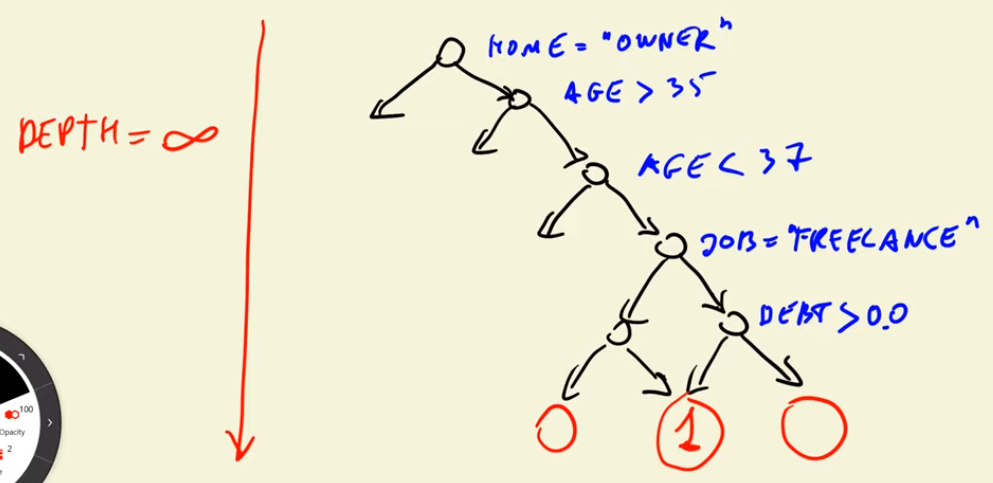

- Our model has memorized the profile above(xi), which predicted the customer defaulted, and will predict default for any other profile.
- We can see below in this case, we have a much higher depth and has learnt a rather specific set of rules leading to overfitting

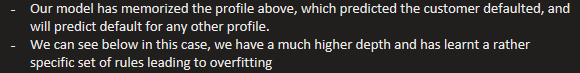

### Retrain DT with max_depth
- To make our model less strict, we can reduce the depth.

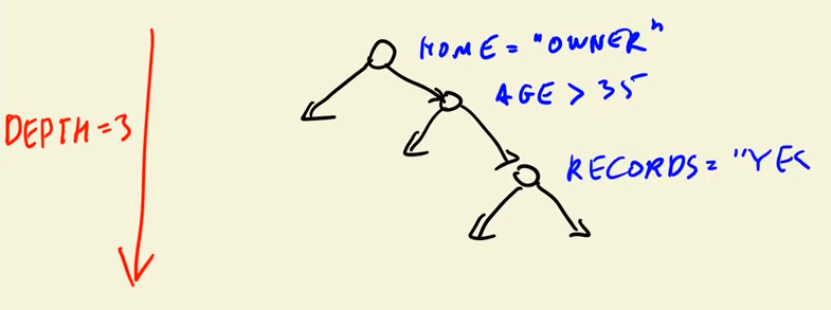

In [503]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [504]:
# Train the model again
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

# Run trained model on validation
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7761016984958594
val: 0.7389079944782155


By adjusting the depth, we can see the performance on validation is significantly better and on the training data it's not overfitted with a perfect score of 1.

#### Decision stump
- setting depth to 1
- The model does worse with a much lower depth

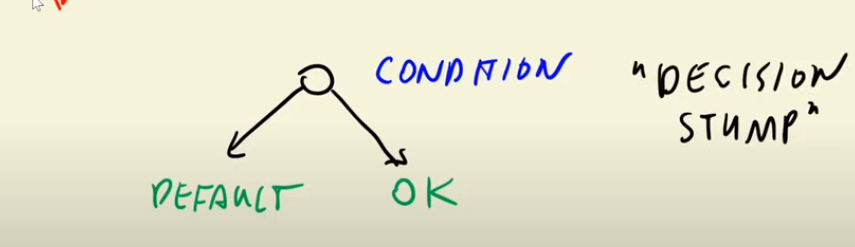

In [505]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.6282660131823559
val: 0.6058644740984719


### Export DT (Decision Tree)
- export_text: method from sklearn.tree class to display the text report showing the rules of a decision tree.

In [506]:
from sklearn.tree import export_text

In [507]:
print(export_text(dt))

|--- feature_26 <= 0.50
|   |--- class: 0
|--- feature_26 >  0.50
|   |--- class: 1



In [508]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=yes <= 0.50
|   |--- class: 0
|--- records=yes >  0.50
|   |--- class: 1



- From the above, we can interpret our Decision stump as below:
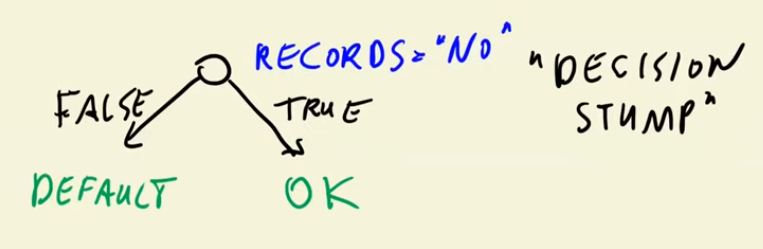

## 6.3 Decision Tree Learning Alogrithm
- Finding the best split for one column
- Finding the best split for the entire dataset
- Stopping criteria
- Decision tree learning algorithm

In [509]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

# Turn above list into a dataframe
df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


#### Decision Trees Learning: Train our decision tree using the assets column

In [510]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [511]:
# Select thresholds
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [512]:
from IPython.display import display

In [513]:
for T in Ts:
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    display(df_right)
    
    print(T)

,assets,status
2,0,default


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


0


,assets,status
1,2000,default
2,0,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


2000


,assets,status
1,2000,default
2,0,default
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


3000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


4000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
0,8000,default
6,9000,ok


5000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
6,9000,ok


8000


#### Split and Misclassification Rate/Impurity

In [514]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]
    
display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_right.status.value_counts(normalize=True))

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64


#### Impurity Table to Decide the Split

In [515]:
for T in Ts:
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    
    print(T)

,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64
0


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64
2000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64
3000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64
4000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64
5000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64
8000


#### Handling more than one feature in DT split

In [516]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000,'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000, 500, 'ok'],
    [3000, 2000,'default'],
]

# Turn above list into a dataframe
df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [517]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [518]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [519]:
for feature, Ts in thresholds.items():
    print('########################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
        
        print()
    print('########################')

########################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

########################
########################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

########################


## 6.5 Decision Trees Parameter Tuning
- selecting max_depth
- selecting min_samples_leaf

#### Adjusting max_depth parameter

In [520]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (d, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.761
  10 -> 0.688
  15 -> 0.669
  20 -> 0.651
None -> 0.643


#### Adjusting min_samples_leaf for selected max_depth values
- that'll be 4,5 and 6 in this case, as they presented the highest auc scores, with 5 having the best at 76%.

In [521]:
for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        print('(%4s, %3d) -> %.3f' % (d, s, auc))

(   4,   1) -> 0.761
(   4,   2) -> 0.761
(   4,   5) -> 0.761
(   4,  10) -> 0.761
(   4,  15) -> 0.764
(   4,  20) -> 0.761
(   4, 100) -> 0.756
(   4, 200) -> 0.747
(   4, 500) -> 0.680
(   5,   1) -> 0.767
(   5,   2) -> 0.766
(   5,   5) -> 0.768
(   5,  10) -> 0.762
(   5,  15) -> 0.772
(   5,  20) -> 0.774
(   5, 100) -> 0.763
(   5, 200) -> 0.759
(   5, 500) -> 0.680
(   6,   1) -> 0.754
(   6,   2) -> 0.763
(   6,   5) -> 0.762
(   6,  10) -> 0.778
(   6,  15) -> 0.785
(   6,  20) -> 0.774
(   6, 100) -> 0.776
(   6, 200) -> 0.768
(   6, 500) -> 0.680


For simplicity and readability, lets put the above in a df

In [522]:
scores = []

for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))

In [523]:
columns=['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,2,0.761283
2,4,5,0.761283
3,4,10,0.761283
4,4,15,0.763726


In [524]:
df_scores.sort_values(by='auc', ascending=False)

,max_depth,min_samples_leaf,auc
22,6,15,0.785319
21,6,10,0.778299
24,6,100,0.776434
23,6,20,0.774279
14,5,20,0.773537
13,5,15,0.772723
25,6,200,0.768267
11,5,5,0.768173
9,5,1,0.766938
10,5,2,0.766938


#### Pivoting DF

In [525]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.767  0.746
2                 0.761  0.767  0.758
5                 0.761  0.768  0.762
10                0.761  0.762  0.778
15                0.764  0.773  0.785
20                0.761  0.774  0.774
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

#### Visualizing as a heatmap

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

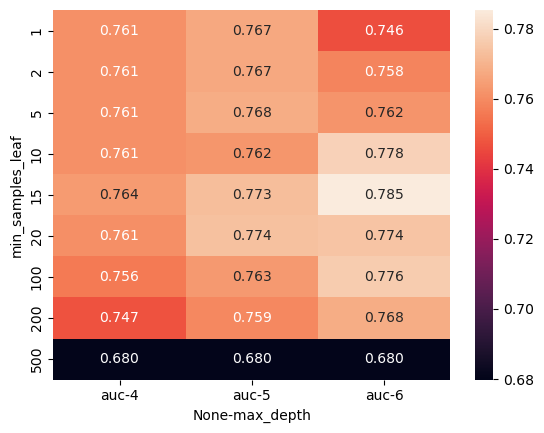

In [526]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

#### Let's increase the size of our max_depth fine tuning to see if it makes a difference

In [527]:
scores = []

for d in [4, 5, 6, 7, 10, 15, 20]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))

In [528]:
columns=['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores.sort_values(by='auc', ascending=False)

,max_depth,min_samples_leaf,auc
40,10,15,0.790517
49,15,15,0.786821
58,20,15,0.786424
41,10,20,0.785537
22,6,15,0.785080
...,...,...,...
53,15,500,0.679842
26,6,500,0.679842
55,20,2,0.677645
54,20,1,0.650063


In [529]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                          
max_depth            4      5      6      7      10     15     20
min_samples_leaf                                                 
1                 0.761  0.767  0.756  0.739  0.698  0.646  0.650
2                 0.761  0.767  0.764  0.747  0.707  0.693  0.678
5                 0.761  0.768  0.761  0.756  0.734  0.714  0.716
10                0.761  0.762  0.778  0.764  0.769  0.760  0.761
15                0.764  0.773  0.785  0.780  0.791  0.787  0.786
20                0.761  0.774  0.774  0.781  0.786  0.784  0.781
100               0.756  0.763  0.776  0.780  0.779  0.780  0.779
200               0.747  0.759  0.768  0.768  0.768  0.768  0.768
500               0.680  0.680  0.680  0.680  0.680  0.680  0.680

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

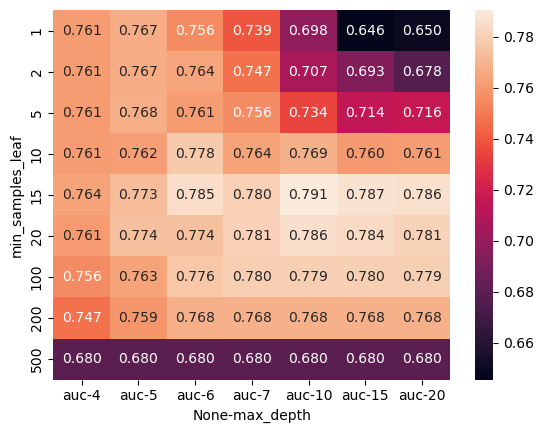

In [530]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

#### Finalize a DT with parameters

In [531]:
dt = DecisionTreeClassifier(max_depth = 6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

## 6.6 Ensembles and random forest
- Board of experts
- Ensembling models
- Random Forest - ensembling decision trees
- Tuning random forest

Random forest is a way of putting multiple DT together.

#### Training multiple models with random features

In [532]:
from sklearn.ensemble import RandomForestClassifier

In [533]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [534]:
# Make predicton
y_pred = rf.predict_proba(X_val)[:, 1]

In [535]:
roc_auc_score(y_val, y_pred)

0.7744726453706618

In [536]:
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

Each time we retrain the model and make a prediction, we'll get a different value above. For this we include the 'random_state=1' parameter above.

#### Testing the model Performance with increasing estimators

In [537]:
scores = []

# range of estimators from 10 - 200
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [538]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


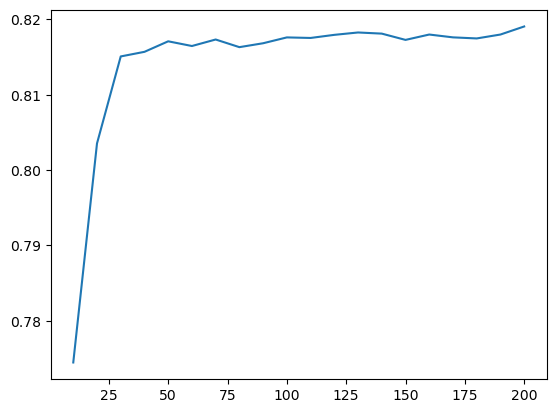

In [539]:
plt.plot(df_scores.n_estimators, df_scores.auc)

Above we see there's no further increament in our model beyond a certain point.

#### Training Models with varying max depth

In [540]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth = d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d,n, auc))

In [541]:
columns=['max_depth','n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


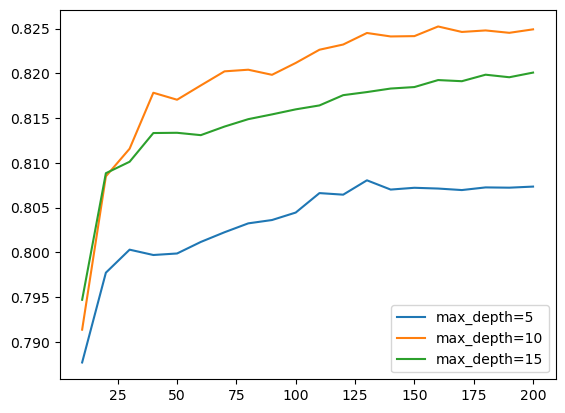

In [542]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, 
            label='max_depth=%d' % d)
    
plt.legend()

10 is the best max_depth parameter.

#### Optimizing parameters for Random Forest model: min_samples_leaf

In [543]:
max_depth = 10

In [544]:
scores = []

# Mean samples leaf
for s in [1, 3, 5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth = max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s , n, auc))

In [545]:
columns=['min_samples_leaf','n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058


In [546]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 15]
list(zip(min_samples_leaf_values, colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (15, 'grey')]

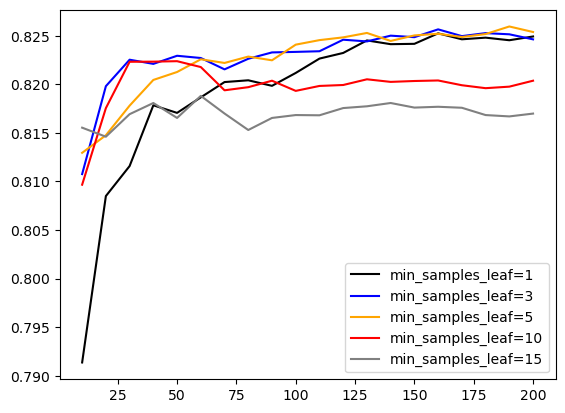

In [547]:
# Loop over s, select values, plot
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 15]

for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color = col,
            label='min_samples_leaf=%d' % s)
    
plt.legend()

#### Training multiple models in parallel for Speed

In [548]:
min_samples_leaf = 3

In [549]:
rf = RandomForestClassifier(n_estimators=n,
                            max_depth = max_depth,
                            min_samples_leaf=min_samples_leaf,
                            n_jobs=-1,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       n_jobs=-1, random_state=1)

other usefl parameters:
- max_features
- bootstrap

## 6.7 Gradient boosting and XGBoost
- Gradient boosting vs random forest
- Installing XGBoost
- Training the first model
- Performance monitoring
- Parsing xgboost's monitoring output

In [550]:
import xgboost as xgb

- Sequential training of gradient boosted trees
- Training XGBoost model with specified parameters

In [551]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

#### Setting Parameters for Binary classification model
- Verbosity controls what kind of warnings to show when we train the model. 
    - 1 means show only warnings.
    - 0 surpresses all warnings
    - 2 shows more granular warnings
- num_boost_round: How many trees we want to grow.    
- eta: 0.3 is the default number, its the rate at which we want the model to learn

In [552]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

# create model
model = xgb.train(xgb_params, dtrain, num_boost_round=200)

#### Creating and Monitoring XGBoost models performance

In [553]:
# check/validate - returns a 1d array
y_pred = model.predict(dval)
y_pred

array([3.95534746e-02, 2.13190774e-03, 4.60552843e-03, 1.68832675e-01,
       3.01061780e-04, 1.30593812e-03, 2.36471504e-04, 6.72035635e-01,
       4.50287908e-01, 7.82015850e-05, 3.88970524e-02, 9.97273266e-01,
       5.37740111e-01, 7.35800364e-04, 4.04056581e-03, 9.60047483e-01,
       4.43820260e-04, 5.44882655e-01, 2.79813400e-03, 7.73551613e-02,
       1.85864349e-03, 1.41037256e-01, 3.98235163e-03, 9.06265795e-01,
       8.58502209e-01, 4.96800989e-03, 8.63798201e-01, 4.12434600e-02,
       9.16178286e-01, 9.13706244e-05, 9.97725070e-01, 3.42956334e-01,
       2.66283881e-02, 8.93705487e-02, 1.45540675e-04, 2.03616692e-05,
       9.99607384e-01, 2.59687871e-01, 8.99421751e-01, 8.69022191e-01,
       2.41115764e-02, 9.76342380e-01, 1.16770891e-02, 6.53584719e-01,
       4.84928933e-05, 4.12175839e-04, 4.47582304e-01, 2.21406459e-04,
       2.80490518e-02, 6.38221251e-03, 1.28188723e-04, 2.73735300e-02,
       4.69494233e-04, 2.57968247e-01, 8.24921846e-01, 5.86968996e-02,
      

In [554]:
roc_auc_score(y_val, y_pred)

0.8003166549611296

if we change the num_boost_round, (ie number of trees) parameter above, we'll observe how this values affects our auc score.

Below we'll create a watchlist, which will contain the datasets with which we want to evaluate our model.
- it takes a list of tuples.

#### Training and Evaluating the model with AUC
- verbose_eval=5 = Print the data at every 5 steps

In [555]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [556]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,   
    'seed': 1,
    'verbosity': 1
}

# create model
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                 evals=watchlist)

[0]	train-auc:0.86300	val-auc:0.76818
[5]	train-auc:0.92863	val-auc:0.80606
[10]	train-auc:0.95002	val-auc:0.81558
[15]	train-auc:0.96558	val-auc:0.81680
[20]	train-auc:0.97316	val-auc:0.81775
[25]	train-auc:0.98174	val-auc:0.81878
[30]	train-auc:0.98772	val-auc:0.81787
[35]	train-auc:0.99180	val-auc:0.81510
[40]	train-auc:0.99456	val-auc:0.81387
[45]	train-auc:0.99596	val-auc:0.81462
[50]	train-auc:0.99688	val-auc:0.81128
[55]	train-auc:0.99787	val-auc:0.80874
[60]	train-auc:0.99889	val-auc:0.80801
[65]	train-auc:0.99919	val-auc:0.80751
[70]	train-auc:0.99944	val-auc:0.80732
[75]	train-auc:0.99964	val-auc:0.80692
[80]	train-auc:0.99985	val-auc:0.80677
[85]	train-auc:0.99986	val-auc:0.80671
[90]	train-auc:0.99992	val-auc:0.80637
[95]	train-auc:0.99996	val-auc:0.80580
[100]	train-auc:0.99998	val-auc:0.80508
[105]	train-auc:0.99999	val-auc:0.80603
[110]	train-auc:1.00000	val-auc:0.80527
[115]	train-auc:1.00000	val-auc:0.80382
[120]	train-auc:1.00000	val-auc:0.80431
[125]	train-auc:1.0000

#### Parsing captured output into train/validation data

In [557]:
%%capture output
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

# create model
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                 evals=watchlist)

In [558]:
s = output.stdout
s.split('\n')

['[0]\ttrain-auc:0.86300\tval-auc:0.76818',
 '[5]\ttrain-auc:0.92863\tval-auc:0.80606',
 '[10]\ttrain-auc:0.95002\tval-auc:0.81558',
 '[15]\ttrain-auc:0.96558\tval-auc:0.81680',
 '[20]\ttrain-auc:0.97316\tval-auc:0.81775',
 '[25]\ttrain-auc:0.98174\tval-auc:0.81878',
 '[30]\ttrain-auc:0.98772\tval-auc:0.81787',
 '[35]\ttrain-auc:0.99180\tval-auc:0.81510',
 '[40]\ttrain-auc:0.99456\tval-auc:0.81387',
 '[45]\ttrain-auc:0.99596\tval-auc:0.81462',
 '[50]\ttrain-auc:0.99688\tval-auc:0.81128',
 '[55]\ttrain-auc:0.99787\tval-auc:0.80874',
 '[60]\ttrain-auc:0.99889\tval-auc:0.80801',
 '[65]\ttrain-auc:0.99919\tval-auc:0.80751',
 '[70]\ttrain-auc:0.99944\tval-auc:0.80732',
 '[75]\ttrain-auc:0.99964\tval-auc:0.80692',
 '[80]\ttrain-auc:0.99985\tval-auc:0.80677',
 '[85]\ttrain-auc:0.99986\tval-auc:0.80671',
 '[90]\ttrain-auc:0.99992\tval-auc:0.80637',
 '[95]\ttrain-auc:0.99996\tval-auc:0.80580',
 '[100]\ttrain-auc:0.99998\tval-auc:0.80508',
 '[105]\ttrain-auc:0.99999\tval-auc:0.80603',
 '[110]\tt

In [559]:
line = s.split('\n')[0]
line

'[0]\ttrain-auc:0.86300\tval-auc:0.76818'

In [560]:
line.split('\t')

['[0]', 'train-auc:0.86300', 'val-auc:0.76818']

In [561]:
num_iter, train_auc, val_auc = line.split('\t')

#### Extracting iteration and performance data for analysis

In [562]:
int(num_iter.strip('[]'))

0

In [563]:
float(train_auc.split(':')[1])

0.863

In [564]:
float(train_auc.split(':')[1])

0.863

Put it all together in a function now to split and convert every line

In [565]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train=float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        
        results.append((it, train, val))

#     Turn into a dataframe
    columns = ['num_iter', 'train_auc', 'val_auc']  
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [566]:
df_score = parse_xgb_output(output)
df_score.head()

,num_iter,train_auc,val_auc
0,0,0.86300,0.76818
1,5,0.92863,0.80606
2,10,0.95002,0.81558
3,15,0.96558,0.81680
4,20,0.97316,0.81775


#### Plotting model Performance and overfitting detection

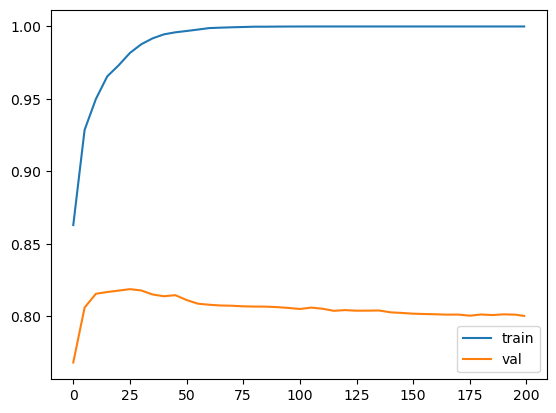

In [567]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

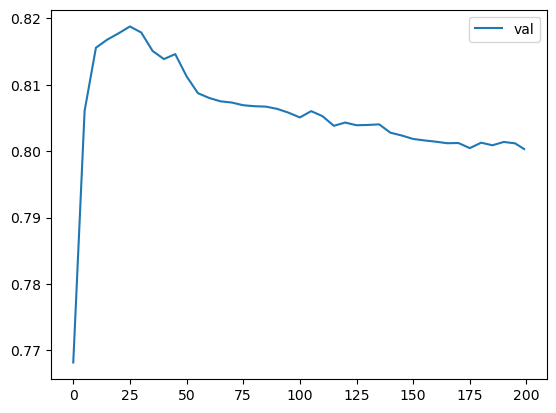

In [568]:
# Looking at validation alone
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

We can see the accuracy declines with more iterations. To fix this we'll tune more parameters.

## 6.8 XGBoost Parameter Tuning
Tuning the following parameters:
- eta
- max_depth
- min_child_weight

#### Getting all values with eta parameter = 0.3.

In [569]:
scores = {}

In [570]:
'eta=%s' % (xgb_params['eta'])

'eta=0.3'

In [571]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [572]:
scores

{'eta=0.3':     num_iter  train_auc  val_auc
 0          0    0.86300  0.76818
 1          5    0.92863  0.80606
 2         10    0.95002  0.81558
 3         15    0.96558  0.81680
 4         20    0.97316  0.81775
 5         25    0.98174  0.81878
 6         30    0.98772  0.81787
 7         35    0.99180  0.81510
 8         40    0.99456  0.81387
 9         45    0.99596  0.81462
 10        50    0.99688  0.81128
 11        55    0.99787  0.80874
 12        60    0.99889  0.80801
 13        65    0.99919  0.80751
 14        70    0.99944  0.80732
 15        75    0.99964  0.80692
 16        80    0.99985  0.80677
 17        85    0.99986  0.80671
 18        90    0.99992  0.80637
 19        95    0.99996  0.80580
 20       100    0.99998  0.80508
 21       105    0.99999  0.80603
 22       110    1.00000  0.80527
 23       115    1.00000  0.80382
 24       120    1.00000  0.80431
 25       125    1.00000  0.80391
 26       130    1.00000  0.80395
 27       135    1.00000  0.80404
 28

In [573]:
scores['eta=0.3']

,num_iter,train_auc,val_auc
0,0,0.86300,0.76818
1,5,0.92863,0.80606
2,10,0.95002,0.81558
3,15,0.96558,0.81680
4,20,0.97316,0.81775
5,25,0.98174,0.81878
6,30,0.98772,0.81787
7,35,0.99180,0.81510
8,40,0.99456,0.81387
9,45,0.99596,0.81462


#### Making eta=1.0

In [574]:
%%capture output
xgb_params = {
    'eta': 1.0,
    'max_depth': 6,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

# create model
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                 evals=watchlist)

In [575]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1.0'

In [576]:
scores['eta=1.0']

,num_iter,train_auc,val_auc
0,0,0.86300,0.76818
1,5,0.95852,0.79032
2,10,0.98435,0.77716
3,15,0.99550,0.78110
4,20,0.99824,0.78091
5,25,0.99980,0.78252
6,30,0.99995,0.77850
7,35,1.00000,0.77592
8,40,1.00000,0.77689
9,45,1.00000,0.77701


#### Making eta=0.1

In [577]:
%%capture output
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

# create model
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                 evals=watchlist)

In [578]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [579]:
scores['eta=0.1']

,num_iter,train_auc,val_auc
0,0,0.86300,0.76818
1,5,0.89688,0.79855
2,10,0.91558,0.80009
3,15,0.93019,0.80707
4,20,0.93933,0.80920
5,25,0.94793,0.81202
6,30,0.95411,0.81557
7,35,0.95900,0.81599
8,40,0.96332,0.81843
9,45,0.96755,0.82226


#### Making eta=0.05

In [580]:
%%capture output
xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

# create model
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                 evals=watchlist)

In [581]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.05'

In [582]:
scores['eta=0.05']

,num_iter,train_auc,val_auc
0,0,0.86300,0.76818
1,5,0.87885,0.77921
2,10,0.89577,0.79998
3,15,0.90790,0.80241
4,20,0.91615,0.80320
5,25,0.92229,0.80493
6,30,0.92750,0.80688
7,35,0.93177,0.81041
8,40,0.93632,0.81020
9,45,0.94184,0.81131


#### Making eta=0.01

In [583]:
%%capture output
xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

# create model
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                 evals=watchlist)

In [584]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [585]:
scores['eta=0.05']

,num_iter,train_auc,val_auc
0,0,0.86300,0.76818
1,5,0.87885,0.77921
2,10,0.89577,0.79998
3,15,0.90790,0.80241
4,20,0.91615,0.80320
5,25,0.92229,0.80493
6,30,0.92750,0.80688
7,35,0.93177,0.81041
8,40,0.93632,0.81020
9,45,0.94184,0.81131


In [586]:
scores.keys()

dict_keys(['eta=0.3', 'eta=1.0', 'eta=0.1', 'eta=0.05', 'eta=0.01'])

#### Creating and Plotting XGBoost Evaluation scores

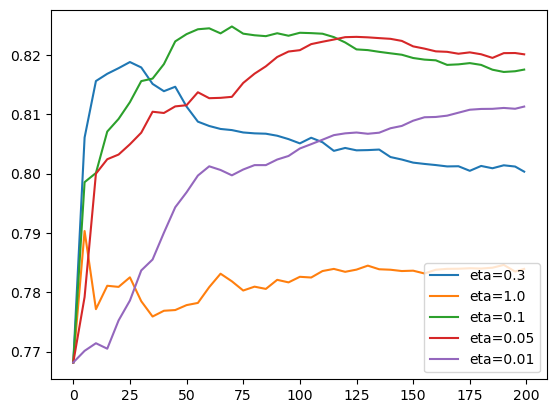

In [587]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

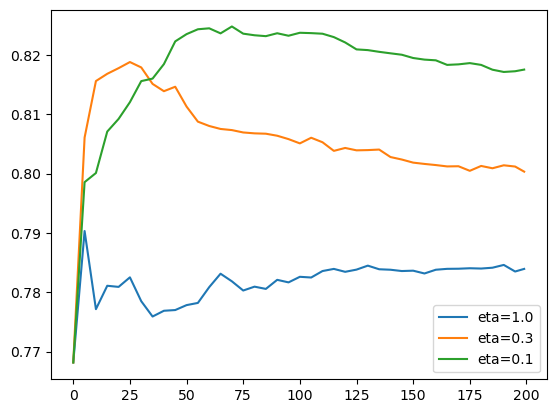

In [588]:
etas = ['eta=1.0', 'eta=0.3', 'eta=0.1']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

- 1.0 is the worst case
- 0.3 does well but drop s after about 25 iterations
- 0.1 seems like the best eta as it doesn't take as much iterations to achieve peak auc score, unlike 0.05  and doesn't decline as fast rate as much as 0.3 eta

#### Tuning Max depth Parameter for model training
- making use of 0.1 as best eta

In [589]:
# reset scores
scores = {}

In [596]:
%%capture output
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

# create model
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                 evals=watchlist)

we'll use max_depths of 3, 4, 6 and 10 by changing the value above and running with each change to append/populate to the scores dictionary, rather than rewriting the code each time.

In [597]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

In [598]:
scores.keys()

dict_keys(['max_depth=10', 'max_depth=3', 'max_depth=4', 'max_depth=6'])

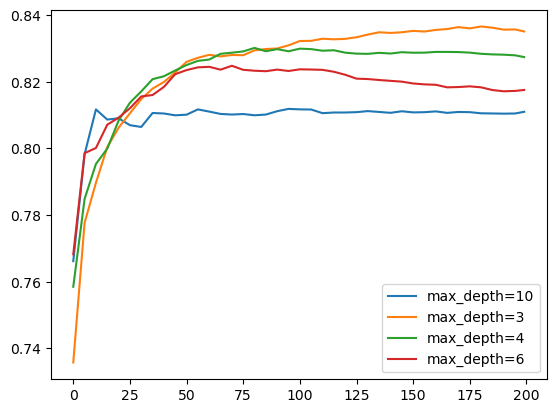

In [599]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.legend()

max_depth =10 is completely off so we'll delete it. it attains peak auc score before others but then remains stagnant and doesn't improve.

In [600]:
del scores['max_depth=10']

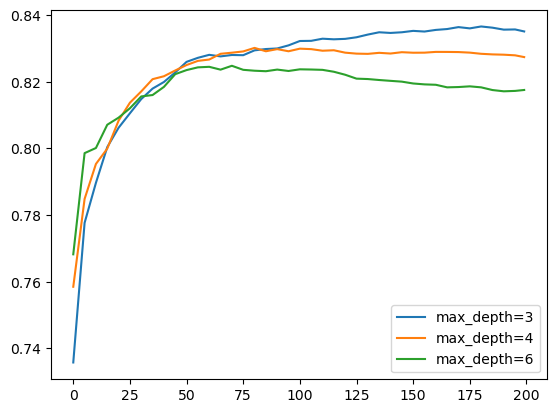

In [601]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.legend()

To get a clearer view let's zoom into y by limiting it

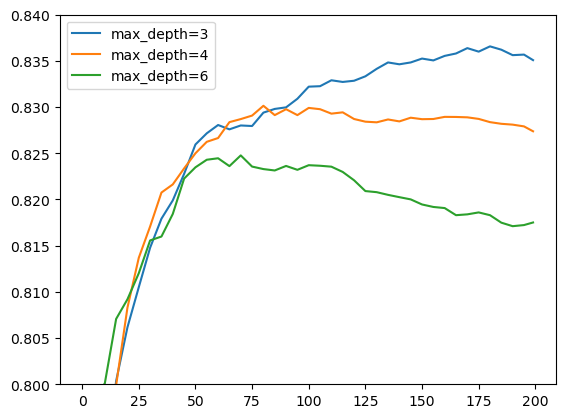

In [602]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.84)    
plt.legend()

We seem to get the best scores after about 175 iterations! and the best max_depth value is 3. Means the size of the tree is only 3 levels. it learns slower but its more stable and attains a better performance.

#### Tuning child weight for decision tree
- making use of following confirmed parameters:
    - eta=0.1
    - max_depth=3

In [612]:
# reset scores
scores = {}

In [335]:
# Delete previous parameters from scores
del scores['max_depth=3']
del scores['max_depth=4']
del scores['max_depth=6']

KeyError: 'max_depth=3'

In [618]:
%%capture output
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight':30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

# create model
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                 evals=watchlist)

For min child weight we'll make use of 1, 10, 30, 

In [619]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

In [620]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30'])

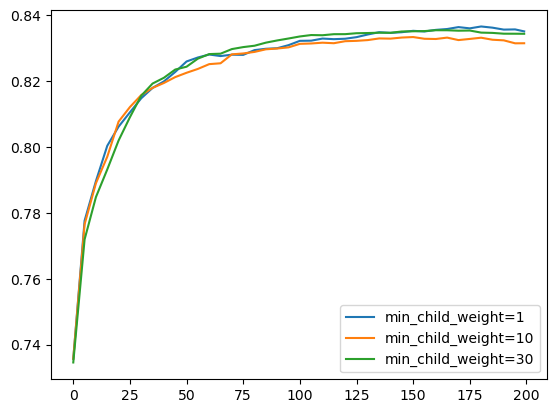

In [621]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

# plt.ylim(0.8, 0.84)    
plt.legend()

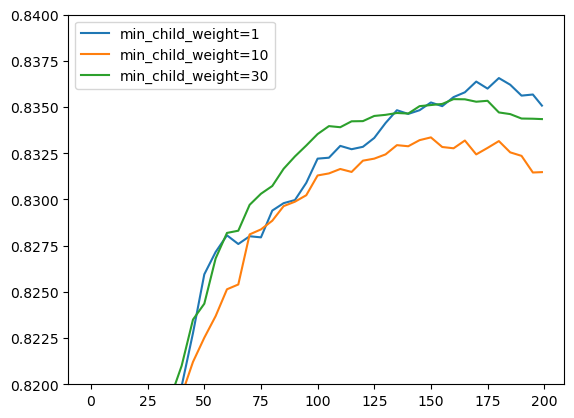

In [622]:
# zoom in
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.82, 0.84)    
plt.legend()

Based on diagram for Alexeys tutorial (not sure why mine above is different), we'll train with 175 iterations.

#### Training Final model with 175 iterations.

In [623]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight':30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

# create model
model = xgb.train(xgb_params, dtrain, num_boost_round=175)

## 6.9 Selecting the Best/Final Model
- Choosing between xgboost, random forest and decision tree
- Training the final model
- Saving the model

#### Train decision tree model with our best decision tree parameters
- max_depth=6, min_samples_leaf=15
- Ref chapter 6.5

In [625]:
# Train decision tree model (DT) with our best decision tree 
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

#### Train model with our Best Random forest
- min_samples_leaf = 3
- max_depth = 10
- Ref chapter 6.6 above

In [626]:
rf = RandomForestClassifier(n_estimators=n,
                            max_depth = 10,
                            min_samples_leaf=3,
                            n_jobs=-1,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       n_jobs=-1, random_state=1)

#### Train model with our XGBoost model

In [627]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight':30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

# create model
model = xgb.train(xgb_params, dtrain, num_boost_round=175)

### Comparing Models for best performance on validation

In [628]:
# Decision tree score
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7853194400716863

In [629]:
# Random forest score
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [633]:
# xgb score
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8354877576227264

XGB has given us the best score so we'll make use of this as the final model with the full dataset.

### Training Final model with full dataset

In [635]:
df_train_full.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3668,ok,22,owner,48,48,married,no,fixed,60,110.0,3000.0,0.0,1000,1460
2540,default,8,other,60,41,married,no,freelance,45,62.0,0.0,0.0,1800,2101
279,ok,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570
3536,ok,1,owner,12,61,married,no,others,45,103.0,20000.0,0.0,300,650
3866,ok,13,owner,60,27,married,no,fixed,35,253.0,7000.0,0.0,1060,1750


In [637]:
df_train_full.reset_index(drop=True)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,22,owner,48,48,married,no,fixed,60,110.0,3000.0,0.0,1000,1460
1,default,8,other,60,41,married,no,freelance,45,62.0,0.0,0.0,1800,2101
2,ok,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570
3,ok,1,owner,12,61,married,no,others,45,103.0,20000.0,0.0,300,650
4,ok,13,owner,60,27,married,no,fixed,35,253.0,7000.0,0.0,1060,1750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,default,4,owner,60,47,married,no,freelance,75,0.0,13500.0,0.0,1900,1976
3559,ok,2,rent,60,28,single,no,fixed,45,101.0,0.0,0.0,1300,1333
3560,ok,2,parents,36,25,single,no,fixed,35,110.0,0.0,0.0,500,1200
3561,ok,4,other,60,25,single,no,fixed,35,162.0,0.0,0.0,1800,2999


In [639]:
# Get target variable converting it to binary
y_full_train = (df_train_full.status =='default').astype(int).values
y_full_train

array([0, 1, 0, ..., 0, 0, 1])

In [640]:
# Delete from table so it doesn't intefere
del df_train_full['status']

### Create feature matrices for train and test

In [643]:
# Get dictionaries 
dicts_full_train = df_train_full.to_dict(orient='records')

# turn into vectors/matrix using dictvectorizer
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

# create test matrix
dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

### Training and Evaluating a ML model

In [644]:
# Creating matrix
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                        feature_names=dv.get_feature_names_out())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names_out())

In [645]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight':30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1
}

# train model with data above
model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [646]:
y_pred = model.predict(dtest)

In [647]:
y_pred[:10]

array([0.36665714, 0.24530032, 0.06214105, 0.20666854, 0.331444  ,
       0.24075198, 0.00640887, 0.02018275, 0.24573833, 0.30608842],
      dtype=float32)

In [648]:
roc_auc_score(y_test, y_pred)

0.8302929964322369

#### XGBOOST outperforms other models for tabular data.

Comparing with what we had with our initial train (0.83548), the difference isn't a lot. its worse by about 0.005/0.5%. 

So we can conclude our model didn't overfit but did rather well "If there is not much difference between model auc scores on the train as well as test data then the model has generalized the patterns well enough."

Generally, XGBoost models perform better on tabular data than other machine learning models but the downside is that these model are easy to overfit cause of the high number of hyperparameter. Therefore, XGBoost models require a lot more attention for parameters tuning to optimize them.